count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64 

Treshold = 500,000 $
More than Treshold:
 False    1451
True        9
Name: SalePrice, dtype: int64


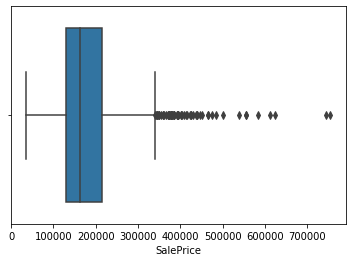

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Train_set_init = pd.read_csv('Dataset/train.csv')
Train_y_init = Train_set_init.SalePrice
Train_set_init.drop(['SalePrice','Id'],axis=1,inplace=True)

print(Train_y_init.describe(),'\n')
treshold = 500 *1000

print('Treshold = {:3,.0f} $'.format(treshold))
print('More than Treshold:\n',(Train_y_init>treshold).value_counts())
sns.boxplot(Train_y_init)
"""
Train_set = Train_set_init.copy()

Train_y = Train_y_init.copy()"""

Train_set_to_reindex = pd.DataFrame(Train_set_init[Train_y_init<=treshold],columns=Train_set_init.columns)
Train_set = Train_set_to_reindex.reset_index(drop=True)
Train_y = pd.Series(Train_y_init[Train_y_init<=treshold].values)

We can see that we have some outliers in the sale price, we can decide of a treshold value to discard the outliers for our machine learning model. Since in the figure we have some outliers with a price higher than 500,000$, I decide to discard those values. 

# EDA on numerical features

## Prepare the data 

In [2]:
Train_set_num_EDA = Train_set.select_dtypes(exclude='object').copy()
Train_set_num_EDA['SalePrice']=Train_y

In [3]:
Train_set_num_EDA.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1451.0,56.960717,42.397924,20.0,20.0,50.0,70.0,190.0
LotFrontage,1192.0,69.833054,24.101168,21.0,59.0,69.0,80.0,313.0
LotArea,1451.0,10442.747760,9916.673175,1300.0,7517.5,9452.0,11506.0,215245.0
OverallQual,1451.0,6.079256,1.362524,1.0,5.0,6.0,7.0,10.0
OverallCond,1451.0,5.578222,1.115370,1.0,5.0,5.0,6.0,9.0
YearBuilt,1451.0,1971.071675,30.189728,1872.0,1954.0,1972.0,2000.0,2010.0
YearRemodAdd,1451.0,1984.749828,20.651395,1950.0,1966.0,1993.0,2004.0,2010.0
MasVnrArea,1443.0,100.526681,173.818532,0.0,0.0,0.0,162.0,1600.0
BsmtFinSF1,1451.0,437.809097,447.757832,0.0,0.0,381.0,705.5,5644.0
BsmtFinSF2,1451.0,46.466575,161.264463,0.0,0.0,0.0,0.0,1474.0


We can see that we have some missing values for some features, we will try to impute with the median value.

In [4]:
from sklearn.impute import SimpleImputer

imput_num = SimpleImputer(strategy='median')

Train_set_num_impute = imput_num.fit_transform(Train_set_num_EDA)
Train_set_num_full = pd.DataFrame(Train_set_num_impute,columns=Train_set_num_EDA.columns)

In [5]:
Train_set_num_full.describe()[:1].T

,count
MSSubClass,1451.0
LotFrontage,1451.0
LotArea,1451.0
OverallQual,1451.0
OverallCond,1451.0
YearBuilt,1451.0
YearRemodAdd,1451.0
MasVnrArea,1451.0
BsmtFinSF1,1451.0
BsmtFinSF2,1451.0


We can now start our analysis.

## Make the EDA on numerical features

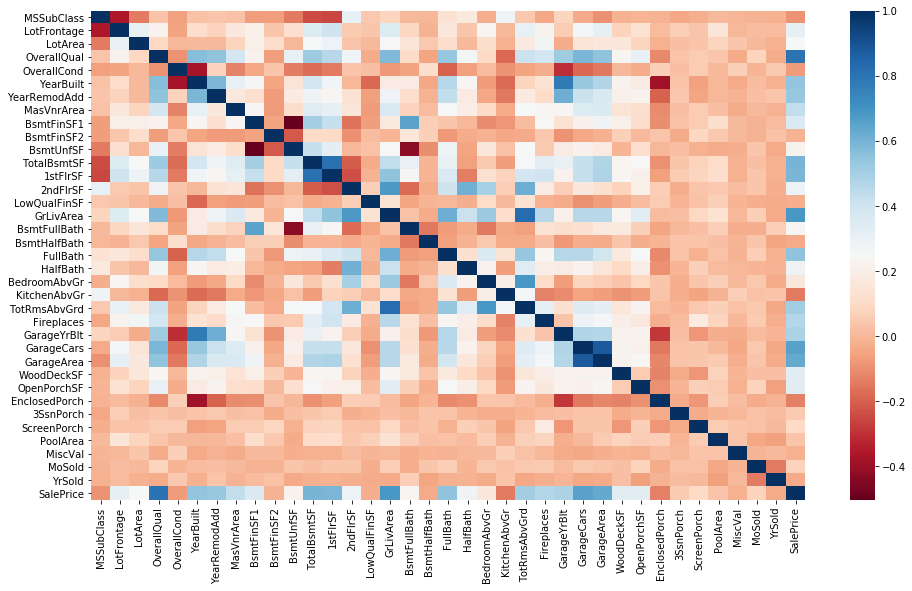

In [6]:
plt.figure(figsize=(16,9))
sns.heatmap(Train_set_num_full.corr(),annot=False,cmap='RdBu')

In [7]:
Train_set_num_full.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.802424
GrLivArea        0.686872
GarageCars       0.654418
GarageArea       0.633607
TotalBsmtSF      0.596771
1stFlrSF         0.589676
FullBath         0.553014
YearBuilt        0.543898
YearRemodAdd     0.531708
TotRmsAbvGrd     0.510964
GarageYrBlt      0.485149
Fireplaces       0.469693
MasVnrArea       0.436515
BsmtFinSF1       0.357076
OpenPorchSF      0.332686
WoodDeckSF       0.331999
LotFrontage      0.318744
2ndFlrSF         0.292447
HalfBath         0.284007
LotArea          0.252156
BsmtFullBath     0.236628
BsmtUnfSF        0.223991
BedroomAbvGr     0.166543
ScreenPorch      0.097277
MoSold           0.074689
3SsnPorch        0.053722
PoolArea         0.032260
BsmtFinSF2      -0.014028
MiscVal         -0.020247
LowQualFinSF    -0.023940
BsmtHalfBath    -0.033044
YrSold          -0.036607
OverallCond     -0.072195
MSSubClass      -0.085954
EnclosedPorch   -0.129293
KitchenAbvGr    -0.142852
Name: SalePrice, dtype: float64

Thanks to this correlation, we can build a list with important features and see some regression figure to gain insight. 

In [8]:
Lst_Very_Important = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','FullBath','TotRmsAbvGrd','SalePrice']

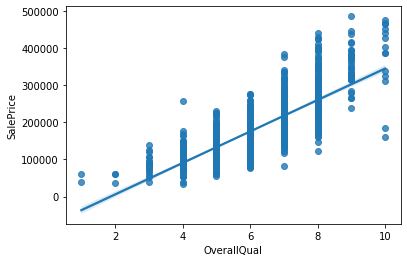

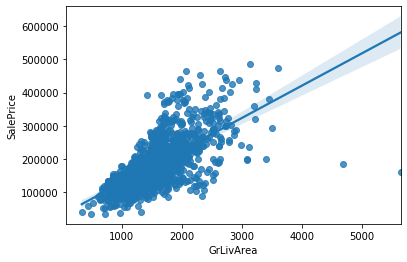

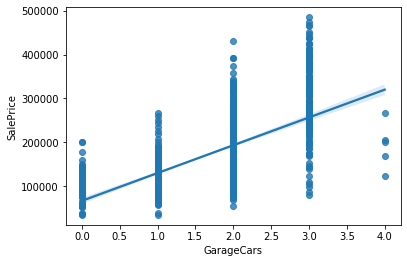

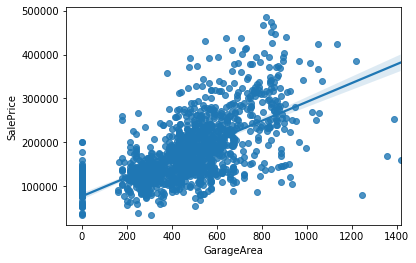

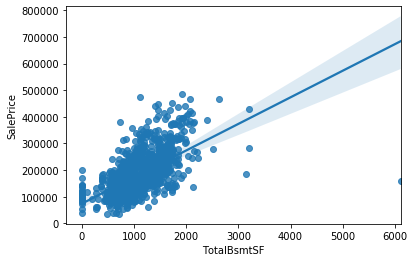

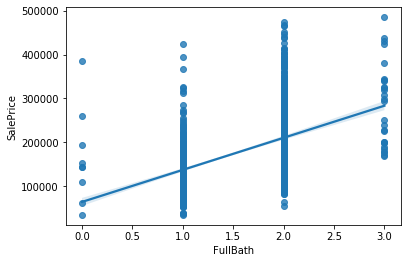

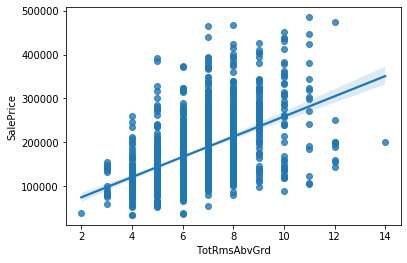

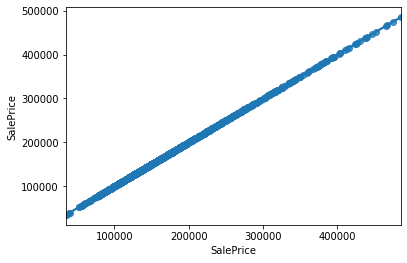

In [9]:
for elt in Lst_Very_Important:
    plt.figure()
    sns.regplot(Train_set_num_full[elt],Train_set_num_full.SalePrice)

With this figures, we can see some outliers and we have to check them: 
- OverallQual : We have values that is less than 150,000 , even with good rate.
- GrLivArea : We have some values that is less than 200,000 even with huge area (more than 4000 square feet (SF) )
- GarageCars : Even with a car capacity arround 4, the price is not very expensive
- GarageArea : Like GarageCars, even we have a lot of area for the garage (more than 1200) the price is not so expensive
- TotalBsmtSF: We have one outlier, a basement with more than 6000 SF and sold less than 200,000 
- TotRmsAbvGrd: We have one outlier with 14 rooms above ground, but sold less than 200,000

### OverallQual 


In [10]:
Train_set_num_full[Train_set_num_full.OverallQual ==10].sort_values(by='SalePrice')['SalePrice']

1289    160000.0
521     184750.0
1433    310000.0
581     325000.0
988     337500.0
820     385000.0
223     386250.0
513     402861.0
388     426000.0
58      438780.0
589     451950.0
1234    465000.0
1364    466500.0
184     475000.0
Name: SalePrice, dtype: float64

We have a gap between the two first index and the others (the price is mutliply by 2 !)

In [11]:
# The array of index we have to drop
Index_array_to_drop = np.array(Train_set_num_full[Train_set_num_full.OverallQual ==10].sort_values(by='SalePrice')['SalePrice'].index[:2].values)

### GrLivArea

In [12]:
Train_set_num_full[Train_set_num_full.GrLivArea > 4000].sort_values(by='SalePrice')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1289,60.0,313.0,63887.0,10.0,5.0,2008.0,2008.0,796.0,5644.0,0.0,...,214.0,292.0,0.0,0.0,0.0,480.0,0.0,1.0,2008.0,160000.0
521,60.0,130.0,40094.0,10.0,5.0,2007.0,2008.0,762.0,2260.0,0.0,...,208.0,406.0,0.0,0.0,0.0,0.0,0.0,10.0,2007.0,184750.0


The price of the first two houses is too cheap (160,000 or 184,750 against more than 745,000 for the others houses with a Ground live Area more than 4000 SF).

In [13]:
Index_array_to_drop = np.concatenate((Index_array_to_drop,Train_set_num_full[Train_set_num_full.GrLivArea > 4000].sort_values(by='SalePrice').index[:2].values))

### GarageCars 

In [14]:
Train_set_num_full[Train_set_num_full.GarageCars ==4].sort_values(by='SalePrice')['SalePrice']

1331    123000.0
1181    168000.0
1341    200000.0
419     206300.0
744     265979.0
Name: SalePrice, dtype: float64

In [15]:
print('Average price for a house with garage cars capacity 4 : {:3,.0f} $'.format(Train_set_num_full[Train_set_num_full.GarageCars ==4].sort_values(by='SalePrice')['SalePrice'].mean()))

Average price for a house with garage cars capacity 4 : 192,656 $


In [16]:
print('Average price for a house with garage cars capacity 3 : {:3,.0f} $'.format(Train_set_num_full[Train_set_num_full.GarageCars ==3].sort_values(by='SalePrice')['SalePrice'].mean()))

Average price for a house with garage cars capacity 3 : 294,030 $


We can see a counterintuitive things : the average price for house with cars capacyti of 3 is higher than with a capacyti of 4. We can discard the elements with Garage Cars equal to 4.

In [17]:
Index_array_to_drop = np.concatenate((Index_array_to_drop,Train_set_num_full[Train_set_num_full.GarageCars ==4].sort_values(by='SalePrice')['SalePrice'].index.values))

### GarageArea 

In [18]:
Train_set_num_full[Train_set_num_full.GarageArea > 1200].sort_values(by='SalePrice')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1054,30.0,120.0,18000.0,3.0,4.0,1935.0,1950.0,0.0,0.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,560.0,8.0,2008.0,81000.0
1289,60.0,313.0,63887.0,10.0,5.0,2008.0,2008.0,796.0,5644.0,0.0,...,214.0,292.0,0.0,0.0,0.0,480.0,0.0,1.0,2008.0,160000.0
1181,190.0,69.0,32463.0,4.0,4.0,1961.0,1975.0,149.0,1159.0,0.0,...,439.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2007.0,168000.0
579,20.0,98.0,12704.0,8.0,5.0,2008.0,2009.0,306.0,0.0,0.0,...,0.0,90.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,253293.0
820,20.0,114.0,14803.0,10.0,5.0,2007.0,2008.0,816.0,1636.0,0.0,...,188.0,45.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,385000.0


We have too many different prices for such houses, we can simply discard this instances, to have a cleaner set. 

In [19]:
Index_array_to_drop = np.concatenate((Index_array_to_drop,Train_set_num_full[Train_set_num_full.GarageArea > 1200].sort_values(by='SalePrice').index.values))

### TotalBsmtSF

In [20]:
Train_set_num_full[Train_set_num_full.TotalBsmtSF > 4000].sort_values(by='SalePrice')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1289,60.0,313.0,63887.0,10.0,5.0,2008.0,2008.0,796.0,5644.0,0.0,...,214.0,292.0,0.0,0.0,0.0,480.0,0.0,1.0,2008.0,160000.0


With more than 4000 SF for the basement, we have a house sold at 160,000 (conterintuitive)

In [21]:
Index_array_to_drop = np.concatenate((Index_array_to_drop,Train_set_num_full[Train_set_num_full.TotalBsmtSF > 4000].sort_values(by='SalePrice').index.values))


### TotRmsAbvGrd

In [22]:
Train_set_num_full[Train_set_num_full.TotRmsAbvGrd > 12].sort_values(by='SalePrice')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
633,190.0,60.0,10896.0,6.0,7.0,1914.0,1995.0,0.0,256.0,0.0,...,0.0,110.0,0.0,0.0,0.0,0.0,0.0,3.0,2007.0,200000.0


With more than 12 rooms above ground, we have a house sold at 200,000 (conterintuitive)

In [23]:
Index_array_to_drop = np.concatenate((Index_array_to_drop,Train_set_num_full[Train_set_num_full.TotRmsAbvGrd > 12].sort_values(by='SalePrice').index.values))

## Remove outliers

In [24]:
Outliers_index = list(np.unique(Index_array_to_drop))
Outliers_index

[419, 521, 579, 633, 744, 820, 1054, 1181, 1289, 1331, 1341]

In [25]:
Train_set_num_full.drop(Outliers_index,inplace=True)

## Continue the EDA

We can also plot some figures, using categorical price instead of values. 
For example : 

- Cheap :  price is less than the first quantile (Q1)
- Normal:  price is in the IQR
- Quite expensive: price is the third quantile and the upper whisker (with boxplot = Q3 + 1.5 x IQR )  
- Expensive: price is more than the upper whisker 

In [26]:
Q1 = Train_y.quantile(0.25)
Q3 = Train_y.quantile(0.75)
IQR = Q3 - Q1
 
Upper_whisker = Q3 + 1.5*IQR

Train_y_cat = Train_y.copy()

Train_y_cat[Train_y < Q1] = 'Cheap'
print('Cheap means less than {:3,.0f} $'.format(Q1))

Train_y_cat[np.logical_and(Train_y >= Q1,Train_y <= Q3)] = 'Normal'
print('Normal means between {:3,.0f} $ and {:3,.0f} $'.format(Q1,Q3))

Train_y_cat[np.logical_and(Train_y > Q3,Train_y <= Upper_whisker)] = 'Quite_Expensive'
print('Quite expensive means between {:3,.0f} $ and {:3,.0f} $'.format(Q3,Upper_whisker))

Train_y_cat[Train_y > Upper_whisker ] = 'Expensive'
print('Expensive means more than {:3,.0f} $'.format(Upper_whisker))

Train_y_cat_order = ['Cheap','Normal','Quite_Expensive','Expensive']

Cheap means less than 129,900 $
Normal means between 129,900 $ and 213,000 $
Quite expensive means between 213,000 $ and 337,650 $
Expensive means more than 337,650 $


In [27]:
Train_set_num_full['SalePrice_cat'] = Train_y_cat

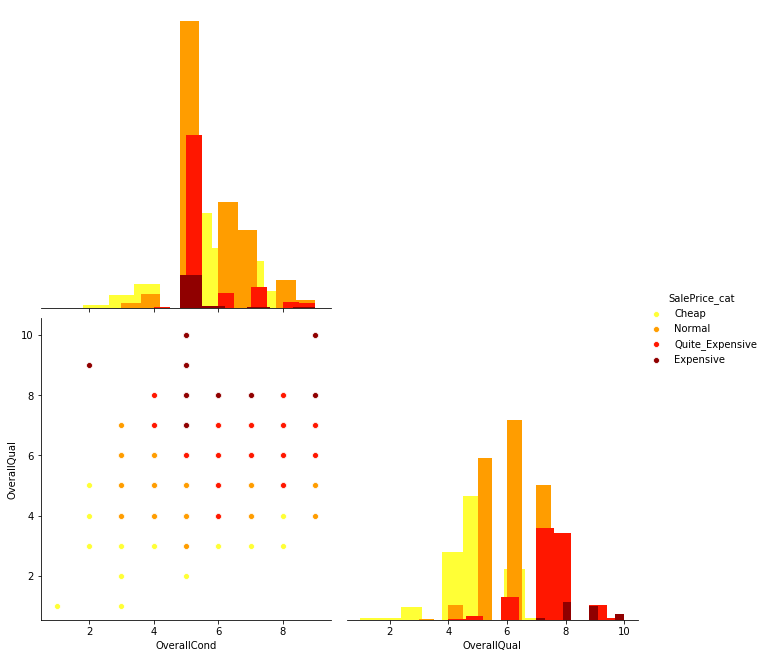

In [28]:
sns.pairplot(Train_set_num_full[['OverallCond','OverallQual','SalePrice_cat']],
             hue='SalePrice_cat',hue_order=Train_y_cat_order,diag_kind="hist",corner=True,
             height=4.5,palette=sns.color_palette("hot_r",4))

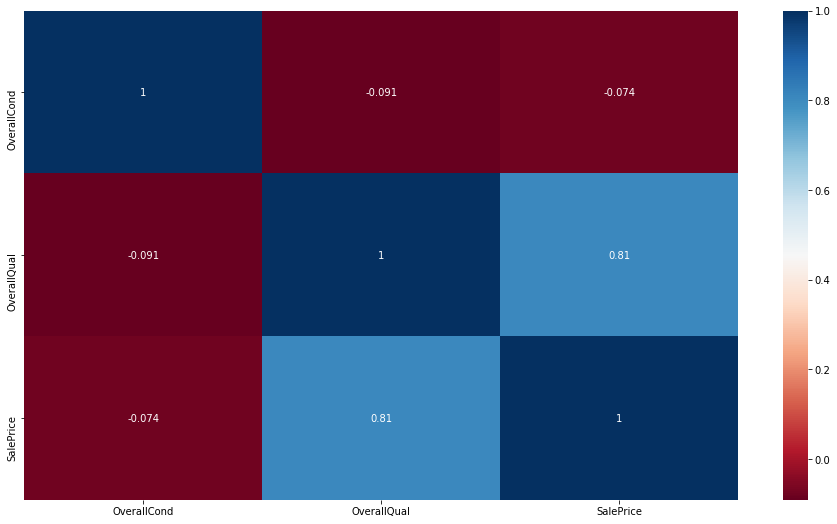

In [29]:
plt.figure(figsize=(16,9))
sns.heatmap(Train_set_num_full[['OverallCond','OverallQual','SalePrice']].corr(),annot=True,cmap='RdBu')

Since the OverallQual is more correlated to the SalePrice, we can put more weights ! 

E.g. 0.8 * OverallQual + 0.2 * OverallCond 

We can also replace the 'OverallCond','OverallQual features with a combination of both features (e.g. the sum, with the correct weights) !

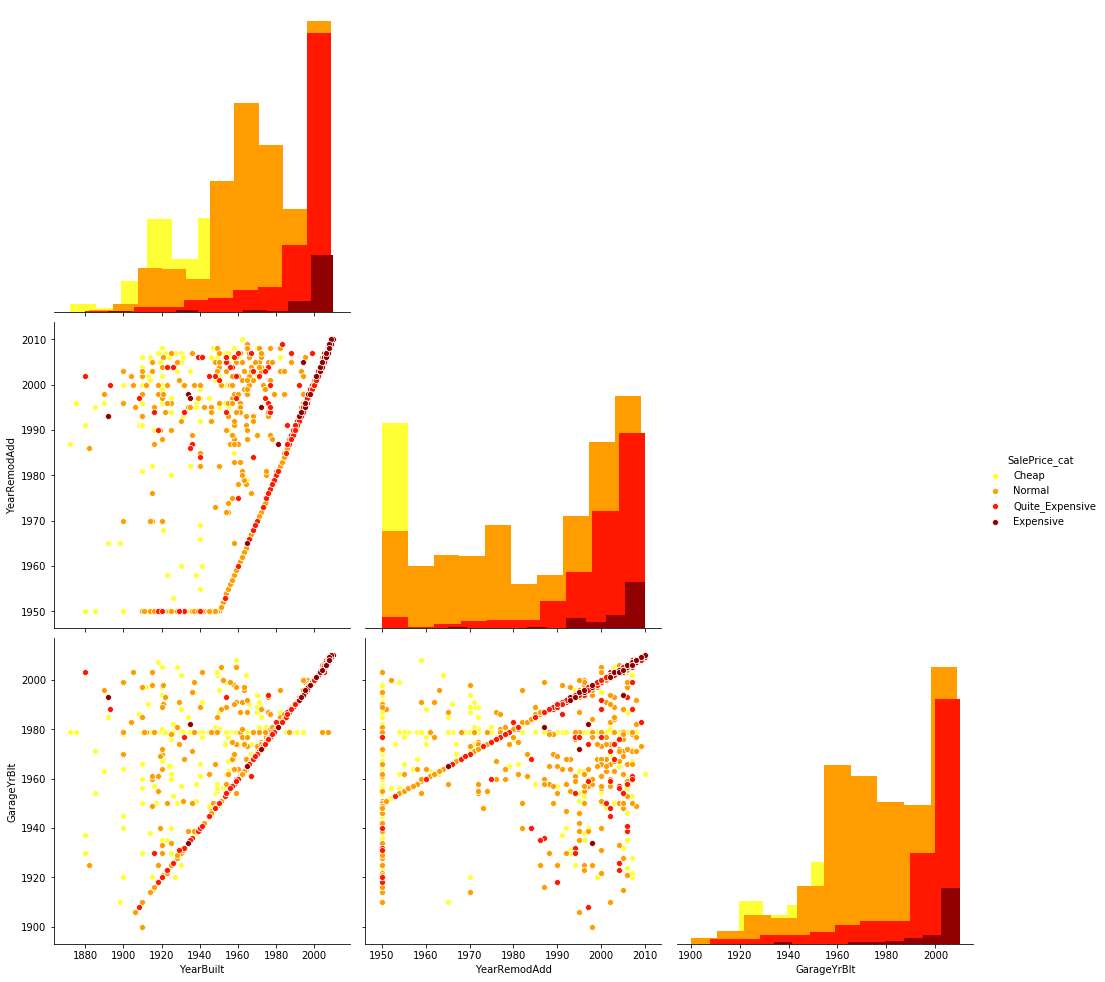

In [30]:
sns.pairplot(Train_set_num_full[['YearBuilt','YearRemodAdd','GarageYrBlt','SalePrice_cat']],
             hue='SalePrice_cat',hue_order=Train_y_cat_order,diag_kind="hist",corner=True,
             height=4.5,palette=sns.color_palette("hot_r",4))

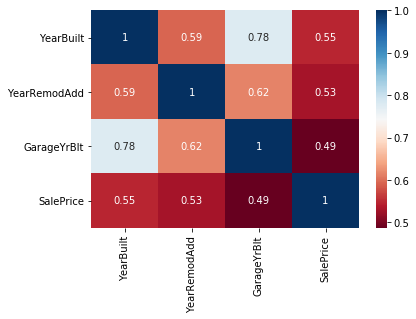

In [31]:
sns.heatmap(Train_set_num_full[['YearBuilt','YearRemodAdd','GarageYrBlt','SalePrice']].corr(),annot=True,cmap='RdBu')

Since the correlation between  year built, year remodel date and the price is quite the same, we can ignore one of this date. 

We can make the assumption that the remodAdd is better (the date take into acount the remodel !)

Garage Year built is very corellated to the Year built, so we could remove the Garage Year built !

In [32]:
(Train_set_num_full['1stFlrSF'] + Train_set_num_full['2ndFlrSF'] == Train_set_num_full.GrLivArea).value_counts()

True     1415
False      25
dtype: int64

Since the sum is quite the same, we can ignore the 1stFlrSF & 2ndFlrSF.

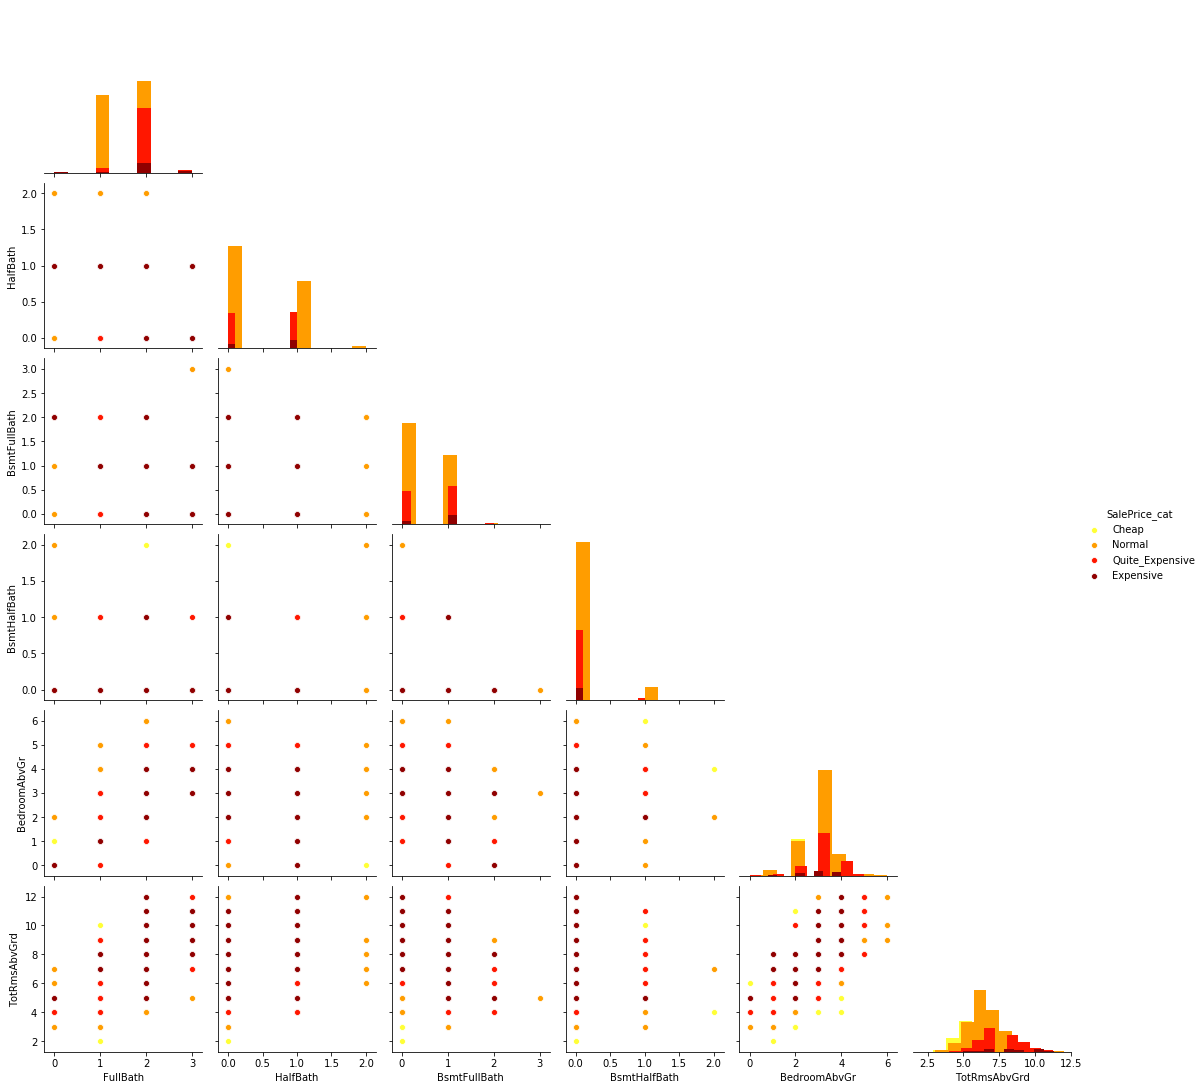

In [33]:
sns.pairplot(Train_set_num_full[['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','TotRmsAbvGrd','SalePrice_cat']],
             hue='SalePrice_cat',hue_order=Train_y_cat_order,diag_kind="hist",corner=True,
             palette=sns.color_palette("hot_r",4))

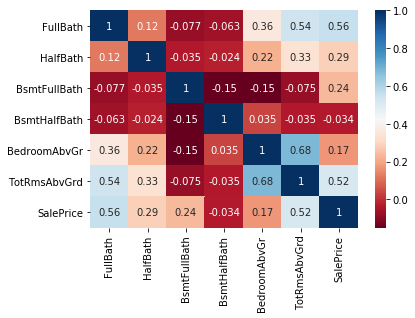

In [34]:
sns.heatmap(Train_set_num_full[['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','TotRmsAbvGrd','SalePrice']].corr(),annot=True,cmap='RdBu')

We can see that the number of bedrooms is correlated with the number of rooms ! 

We can drop this columns (bedrooms) and also the bsmt baths !

We can also add the full and half bathrooms to one feature = Nb_Bathrooms

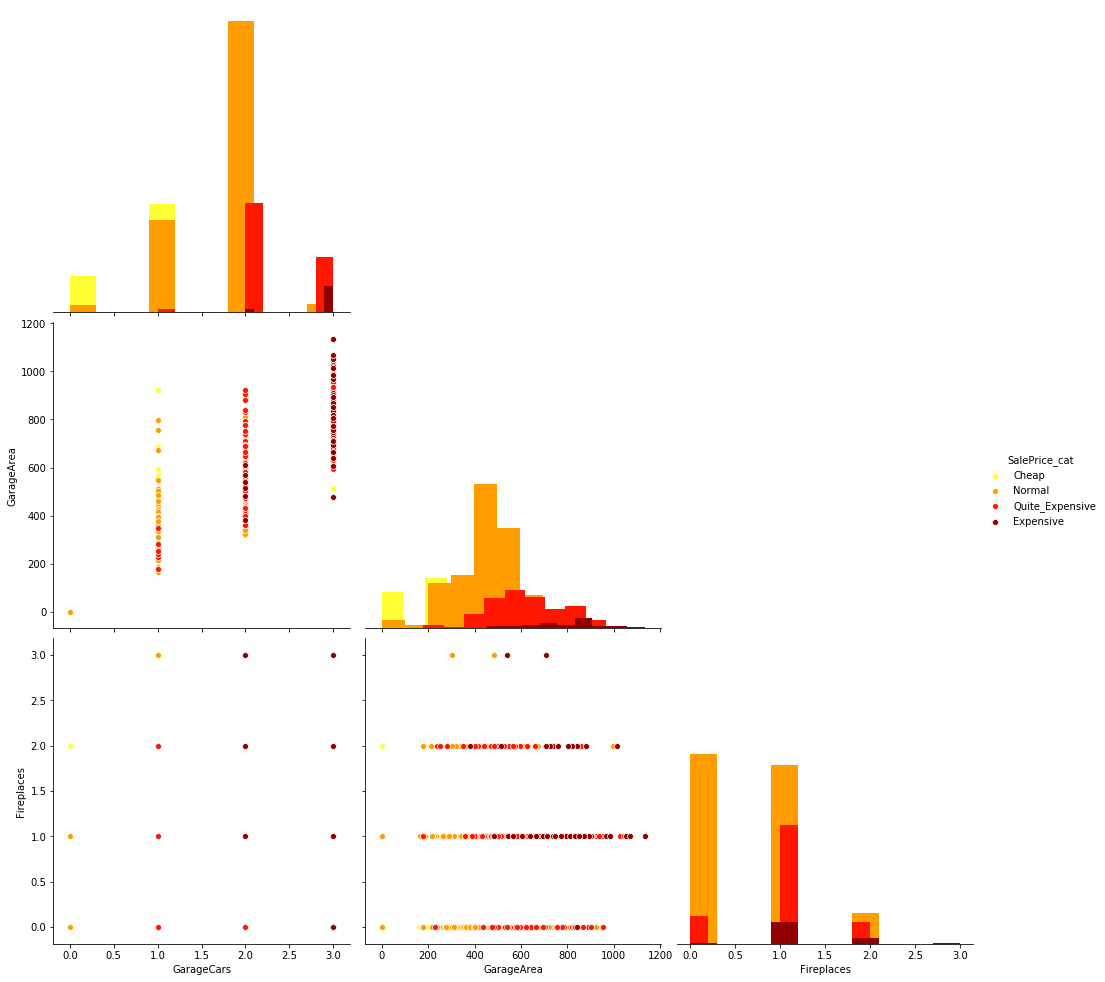

In [35]:
sns.pairplot(Train_set_num_full[['GarageCars','GarageArea','Fireplaces','SalePrice_cat']],
             hue='SalePrice_cat',hue_order=Train_y_cat_order,diag_kind="hist",corner=True,
             height=4.5,palette=sns.color_palette("hot_r",4))

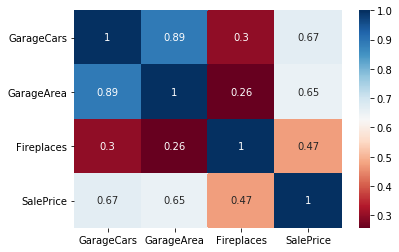

In [36]:
sns.heatmap(Train_set_num_full[['GarageCars','GarageArea','Fireplaces','SalePrice']].corr(),annot=True,cmap='RdBu')

No Surprise, Garage Cars is correlated to the Garage Area and SalePrice 

We can drop Garage Area (continuous value) and keep Garage Cars (discrete value)!

In [37]:
Train_set_num_full.MiscVal.value_counts().sort_index(ascending=True)

0.0        1389
54.0          1
350.0         1
400.0        11
450.0         4
480.0         2
500.0         8
600.0         4
620.0         1
700.0         5
800.0         1
1150.0        1
1200.0        2
1300.0        1
1400.0        1
2000.0        4
2500.0        1
3500.0        1
8300.0        1
15500.0       1
Name: MiscVal, dtype: int64

Since MiscVal has a lot of informations equal to zero we can drop this columns !

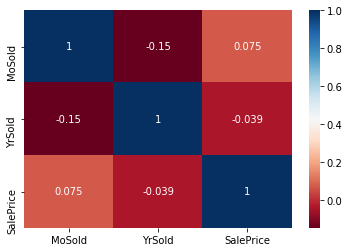

In [38]:
sns.heatmap(Train_set_num_full[['MoSold','YrSold','SalePrice']].corr(),annot=True,cmap='RdBu')

No correlation with the saleprice, we can remove the MoSold and the YrSold !

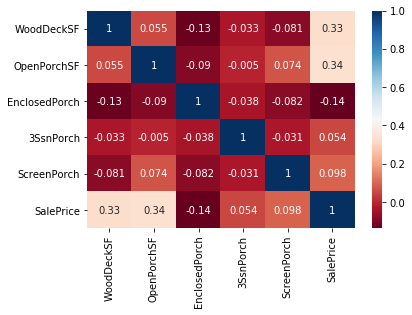

In [39]:
sns.heatmap(Train_set_num_full[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','SalePrice']].corr(),annot=True,cmap='RdBu')

We can transform the 3 porch features with one feature, and add more weight for the OpenPorchSF

e.g. 0.7*OpenPorchSF + 0.1 * ['EnclosedPorch','3SsnPorch','ScreenPorch']

## Build a pipeline to transform the numerical features

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


Train_set_num = Train_set.select_dtypes(exclude='object')
# We drop the outliers
Train_set_num = Train_set_num.drop(Outliers_index).reset_index(drop=True)

List_num_Features = list(Train_set.select_dtypes(exclude='object'))

OverallCond_ix,OverallQual_ix = Train_set_num.columns.get_loc('OverallCond') , Train_set_num.columns.get_loc('OverallQual')
FullBath_ix , HalfBath_ix = Train_set_num.columns.get_loc('FullBath'),Train_set_num.columns.get_loc('HalfBath')
OpenPorchSF_ix,EnclosedPorch_ix,snPorch_ix,ScreenPorch_ix = Train_set_num.columns.get_loc('OpenPorchSF'),Train_set_num.columns.get_loc('EnclosedPorch'),Train_set_num.columns.get_loc('3SsnPorch'),Train_set_num.columns.get_loc('ScreenPorch')

Lst_to_drop=[Train_set_num.columns.get_loc('MSSubClass'),Train_set_num.columns.get_loc('OverallCond'),
             Train_set_num.columns.get_loc('OverallQual'),Train_set_num.columns.get_loc('OverallCond'),
             Train_set_num.columns.get_loc('YearBuilt'),Train_set_num.columns.get_loc('GarageYrBlt'),
             Train_set_num.columns.get_loc('BedroomAbvGr'),Train_set_num.columns.get_loc('BsmtFullBath'),
             Train_set_num.columns.get_loc('BsmtHalfBath'),Train_set_num.columns.get_loc('1stFlrSF'),
             Train_set_num.columns.get_loc('2ndFlrSF'),Train_set_num.columns.get_loc('FullBath'),
             Train_set_num.columns.get_loc('HalfBath'), Train_set_num.columns.get_loc('GarageArea'),
             Train_set_num.columns.get_loc('MiscVal'),Train_set_num.columns.get_loc('MoSold'),
             Train_set_num.columns.get_loc('YrSold'),Train_set_num.columns.get_loc('OpenPorchSF'),
             Train_set_num.columns.get_loc('EnclosedPorch'),Train_set_num.columns.get_loc('3SsnPorch'),
             Train_set_num.columns.get_loc('ScreenPorch'),]

class Num_Features_Transformation (BaseEstimator,TransformerMixin):
    def __init__(self,drop_features=False):
        self.drop_features = drop_features
    
    def fit(self,X,y=None):
        self.OverallCond,self.OverallQual = OverallCond_ix,OverallQual_ix
        self.FullBath , self.HalfBath = FullBath_ix , HalfBath_ix
        self.OpenPorchSF,self.EnclosedPorch,self.SsnPorch,self.ScreenPorch = OpenPorchSF_ix,EnclosedPorch_ix,snPorch_ix,ScreenPorch_ix
        return self
    
    def transform(self,X):
        coef=0.8
        OverallRates = (coef*X[:,self.OverallCond] + (1-coef)*X[:,self.OverallQual])
        NbBath=X[:,self.FullBath]+0.5*X[:,self.HalfBath]
        PorchSF=0.7*X[:,self.OpenPorchSF] + 0.1 * (X[:,self.EnclosedPorch]+X[:,self.SsnPorch]+X[:,self.ScreenPorch])
        
        if self.drop_features:
            X_drop = np.delete(X,Lst_to_drop,axis=1)
            return np.c_[X_drop,OverallRates,NbBath,PorchSF] 
        else:
            return np.c_[X,OverallRates,NbBath,PorchSF]  

In [41]:
from sklearn.impute import SimpleImputer

Drop_features_num = False   

num_Pipeline = Pipeline([('imput_num',SimpleImputer(strategy='median')),
                         ('Num_Features_Transformation',Num_Features_Transformation(Drop_features_num))
                        ])

Train_set_num = Train_set.select_dtypes(exclude='object')
Train_set_num_full_EDA = num_Pipeline.fit_transform(Train_set_num)


if Drop_features_num:
    Garage_cars_ix = 13
else: 
    Garage_cars_ix = Train_set_num.columns.get_loc('GarageCars')

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.15,random_state=42)

#since our data set is small, we have to take care about the sampling bias !!
for train_index,val_index in split.split(Train_set_num_full_EDA,Train_set_num_full_EDA[:,Garage_cars_ix]):
    X_train = Train_set_num_full_EDA[train_index,:]
    X_val = Train_set_num_full_EDA[val_index,:]
    y_train = Train_y.loc[train_index]
    y_val = Train_y.loc[val_index]

# EDA on categorical features

In [43]:
Train_set_cat_EDA = Train_set.select_dtypes(include='object').copy()
Train_set_cat_EDA.describe().T

,count,unique,top,freq
MSZoning,1451,5,RL,1142
Street,1451,2,Pave,1445
Alley,91,2,Grvl,50
LotShape,1451,4,Reg,923
LandContour,1451,4,Lvl,1303
Utilities,1451,2,AllPub,1450
LotConfig,1451,5,Inside,1048
LandSlope,1451,3,Gtl,1374
Neighborhood,1451,25,NAmes,225
Condition1,1451,9,Norm,1251


We can see that some features have missing values.

We can see that there are obvious features that we will discard because we have too much missing values. We can discard all the features with a value counts less than 66% of the total instances.

In [44]:
def Missing_cat_features(threshold = 0.5):
    Missing_alpha_features = {}
    criteria = threshold*Train_set_cat_EDA.shape[0]
    for elt in Train_set_cat_EDA.columns:
        if Train_set_cat_EDA[elt].value_counts().sum() != Train_set_cat_EDA.shape[0] and Train_set_cat_EDA[elt].value_counts().sum() < criteria:           
            Missing_alpha_features[elt]=Train_set_cat_EDA[elt].value_counts().sum()
    return Missing_alpha_features

In [45]:
#We have to drop the missing_alpha_features and then do imputing !
Train_set_cat_EDA_drop = Train_set_cat_EDA.drop(Missing_cat_features().keys(),axis=1)


imput_cat = SimpleImputer(strategy='most_frequent')

Train_set_cat_full = pd.DataFrame(imput_cat.fit_transform(Train_set_cat_EDA_drop),columns=Train_set_cat_EDA_drop.columns)

Train_set_cat_full_EDA = pd.concat([Train_set_cat_full,pd.Series(Train_y,name='SalePrice')],axis=1)

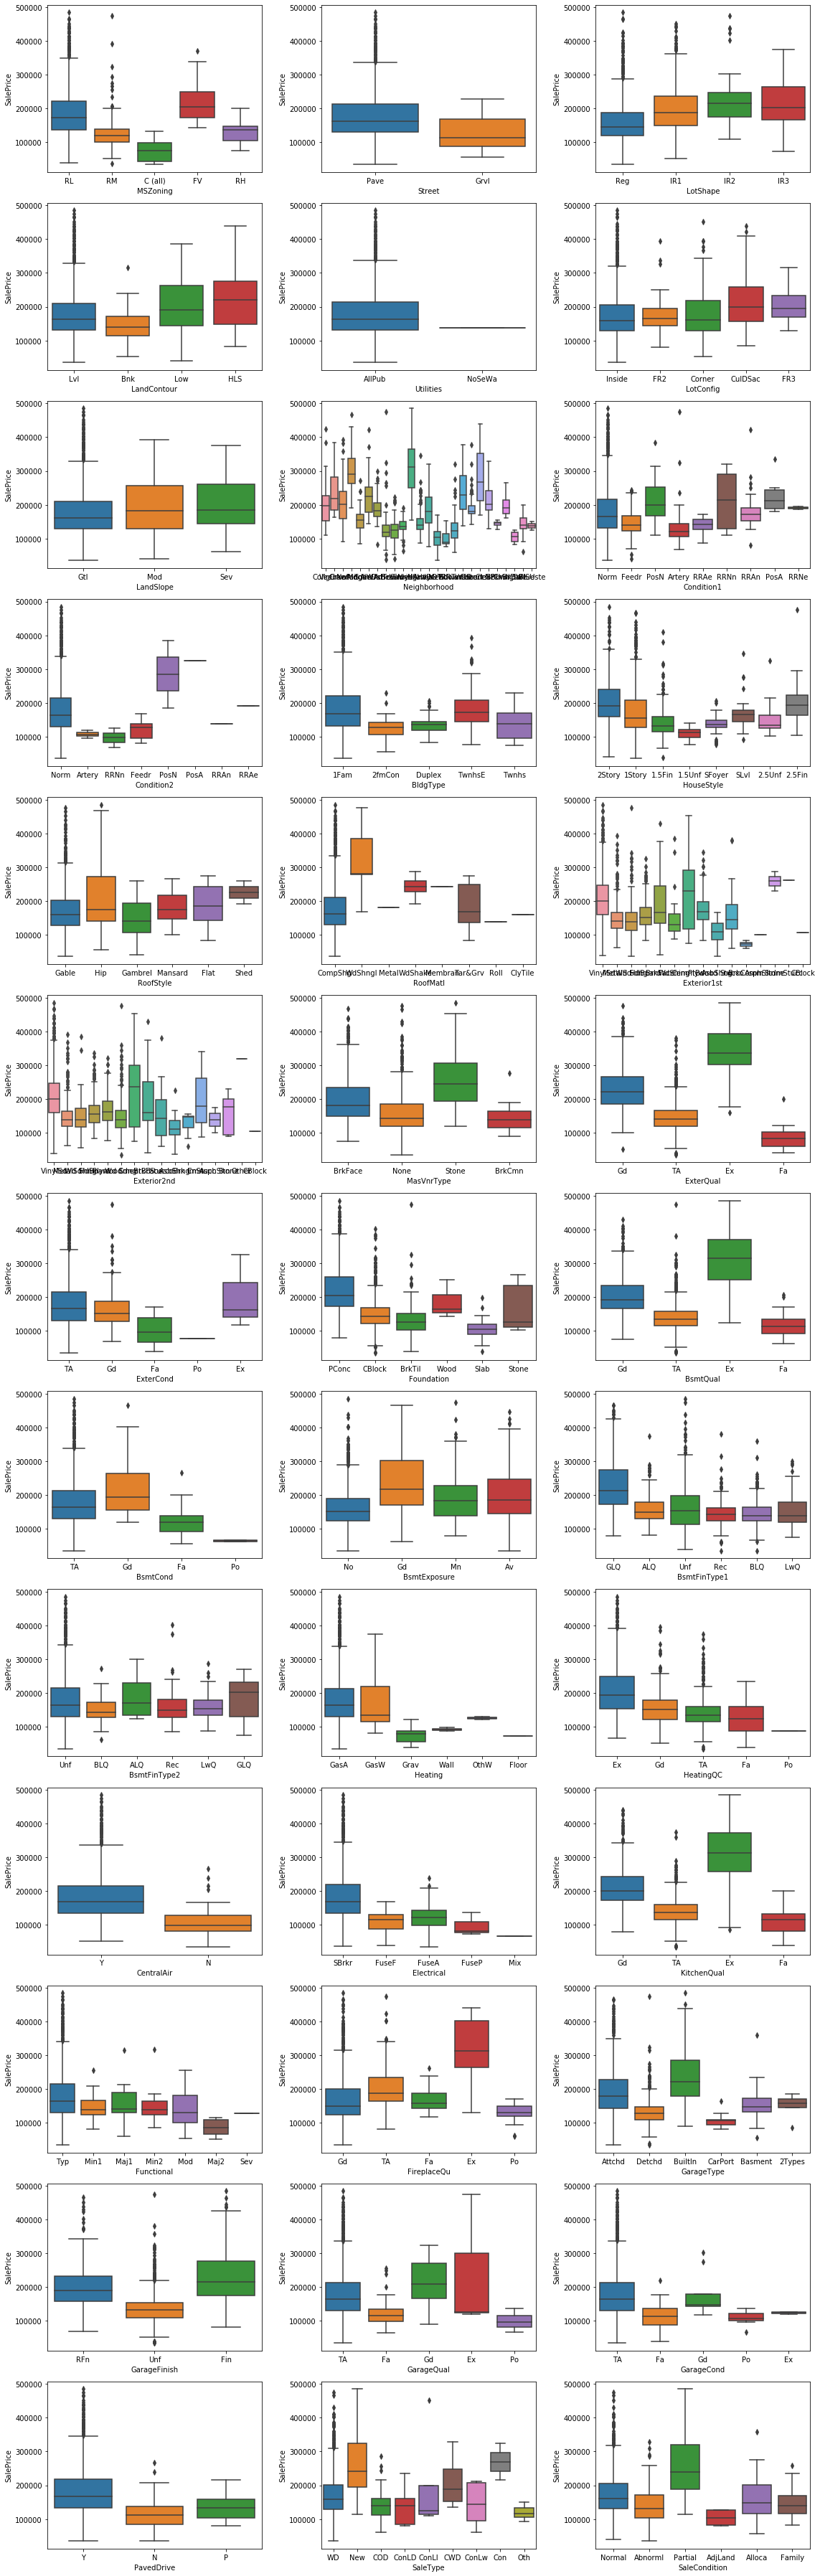

In [46]:
i=0
plt.figure(figsize=(16,50))

Nb_col = 3
Nb_row = (Train_set_cat_full_EDA.columns.size) / Nb_col

for elt in Train_set_cat_full_EDA.columns:
        if elt != 'SalePrice':
            i+=1
            plt.subplot(Nb_row,Nb_col,i)
            sns.boxplot(Train_set_cat_full_EDA[elt],Train_set_cat_full_EDA.SalePrice)

plt.tight_layout()

## Build a pipeline to transform the categorical features

In [47]:
Train_set_alpha = Train_set.select_dtypes(include='object')
List_alpha_Features = list(Train_set.select_dtypes(include='object'))


BsmtFinType1_ix,BsmtFinType2_ix = Train_set_alpha.columns.get_loc('BsmtFinType1') ,Train_set_alpha.columns.get_loc('BsmtFinType2') 

Lst_to_keep=[Train_set_alpha.columns.get_loc('Street'),Train_set_alpha.columns.get_loc('ExterQual'),
             Train_set_alpha.columns.get_loc('ExterCond'),Train_set_alpha.columns.get_loc('BsmtQual'),
             Train_set_alpha.columns.get_loc('BsmtCond'),Train_set_alpha.columns.get_loc('BsmtExposure'),       
             Train_set_alpha.columns.get_loc('HeatingQC'),Train_set_alpha.columns.get_loc('CentralAir'),
             Train_set_alpha.columns.get_loc('KitchenQual'),Train_set_alpha.columns.get_loc('GarageFinish'),
             Train_set_alpha.columns.get_loc('GarageQual'),Train_set_alpha.columns.get_loc('PavedDrive'),
             Train_set_alpha.columns.get_loc('FireplaceQu'), Train_set_alpha.columns.get_loc('BsmtFinType2'),
             Train_set_alpha.columns.get_loc('BsmtFinType1'),len(Train_set_alpha.columns),
            ]

class Alpha_Features_Transformation (BaseEstimator,TransformerMixin):
    def __init__(self,drop_features_alpha=False):
        self.drop_features_alpha = drop_features_alpha
    
    def fit(self,X,y=None):
        self.BsmtFinType1,self.BsmtFinType2 = BsmtFinType1_ix,BsmtFinType2_ix
        return self
    
    def transform(self,X):
        BsmtFinRate = (X[:,self.BsmtFinType1] + X[:,self.BsmtFinType2]) / 2
        X_full = np.c_[X,BsmtFinRate]
        if self.drop_features_alpha:
            return  X_full[:,Lst_to_keep]
        else:
            return X_full 

Since we want to use GridSearchCV to help us to find the best machine learning model, we have to take care about the encoder :

In fact, if we have a single value in the value count (e.g. Po in the example), we can't use ordinal encoder, it will raise a ValueError - Found unknown categories during the cross validation, for this feature we have to use One Hot Encoding instead.
    
    Example : 
    - Ex    741 
    - TA    428 
    - Gd    241 
    - Fa     49 
    - Po      1
    - dtype: int64

We could build two pipelines : one for OneHotEncoding and one for OrdinalEncoding, or simply use only OneHotEncoding. We will do it simple :) 

PS: By using only OneHotEncoder I get a score on the kaggle competition equal to 16891.96056


In [48]:
from sklearn.preprocessing import OneHotEncoder
Drop_features_alpha = False   


alpha_Pipeline = Pipeline([('imput_alpha',SimpleImputer(strategy='most_frequent')),
                           ('OneHot_encod',OneHotEncoder(sparse=False)),
                         ('Alpha_Features_Transformation',Alpha_Features_Transformation(Drop_features_alpha))
                        ])

Train_set_alpha = Train_set.select_dtypes(include='object')

Train_set_alpha_full_EDA = alpha_Pipeline.fit_transform(Train_set_alpha)

We can now try to concatenate the categorical data with the numerical. 

In [49]:
from sklearn.compose import ColumnTransformer

# For Pipelining with model we should use a liste of index instead of a list of string ! 
List_num_Features_index = []
List_alpha_Features_index = []

for elt in List_num_Features:
    List_num_Features_index.append(Train_set.columns.get_loc(elt))

for elt in List_alpha_Features:
    List_alpha_Features_index.append(Train_set.columns.get_loc(elt))
#

Full_pipeline = ColumnTransformer([('num',num_Pipeline,List_num_Features_index),
                                   ('alpha',alpha_Pipeline,List_alpha_Features_index),
                                  ])

In [50]:
Full_Training_Set = Full_pipeline.fit_transform(Train_set)
Train_y = np.array(Train_y)

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)

#since our data set is small, we have to take care about the sampling bias !!
for train_index,val_index in split.split(Full_Training_Set,Full_Training_Set[:,Garage_cars_ix]):
    X_train = Full_Training_Set[train_index,:]
    X_val = Full_Training_Set[val_index,:]
    y_train = Train_y[train_index]
    y_val = Train_y[val_index]

-----------------------------------------------------------------------------------

## Test some models

We have a to make prediction, to compare models we will use the standard score : The  Root Mean Square Error (RMSE).

For each model we will test Grid Search CV to find the best estimator.

In [52]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)

#X_inter0 = X_train.copy()
#X_inter1 = X_val.copy()

#X_train = poly_features.fit_transform(X_train)
#X_val = poly_features.transform(X_val)


### Test the Ordinary least squares Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
# No need to make grid search since we don't have hyperparameters

lin_reg = LinearRegression()
%time lin_reg.fit(X_train,y_train)

Wall time: 23 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
from sklearn.metrics import mean_squared_error

y_train_lin_reg_predict = lin_reg.predict(X_train)

print("RMSE for basic Linear Regression : {:0.2f}".format(np.sqrt(mean_squared_error(y_train,y_train_lin_reg_predict))))

RMSE for basic Linear Regression : 17810.47


We will now check the overfitting, with cross validation on the training set. 

In [55]:
from sklearn.model_selection import cross_val_score

lin_reg_cv = cross_val_score(lin_reg,X_train,y_train,scoring='neg_root_mean_squared_error',cv=8)

print("The mean RMSE score for cross vlaidation : {:0.2f}".format(-lin_reg_cv.mean()))

The mean RMSE score for cross vlaidation : 34127.90


We have more than 5% on the RMSE cross val score compare to the "simple" score. This means that we overfitt the data.

But since we use a ordinary linear regression, we can't do nothing to control the overfitting.

Lets check the RMSE on the validation set.

In [56]:
y_val_lin_reg_predict = lin_reg.predict(X_val)

print("RMSE for basic Linear Regression on test set : {:0.2f}".format(np.sqrt(mean_squared_error(y_val,y_val_lin_reg_predict))))

RMSE for basic Linear Regression on test set : 22356.86


Quite good, but we have to select a more powerfull model

### Test the BayesianRidge

In [57]:
from sklearn.linear_model import BayesianRidge

bayes_ridge_params = [
                      {'n_iter':np.linspace(1,501,10).astype(int),
                       'alpha_1':np.linspace(1e-6,1e-5,2),
                       'alpha_2':np.linspace(1e-6,1e-5,2),
                       'lambda_1':np.linspace(1e-6,1e-5,2),
                       'lambda_2':np.linspace(1e-6,1e-5,2),
                      }
                    ]

grid_bayesian = GridSearchCV(BayesianRidge(),bayes_ridge_params,cv=3,verbose=1,n_jobs=-1,
                        return_train_score=True,scoring='neg_root_mean_squared_error')


In [58]:
%time grid_bayesian.fit(X_train,y_train) 

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   15.4s


Wall time: 16.9 s


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   16.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                     alpha_init=None, compute_score=False,
                                     copy_X=True, fit_intercept=True,
                                     lambda_1=1e-06, lambda_2=1e-06,
                                     lambda_init=None, n_iter=300,
                                     normalize=False, tol=0.001,
                                     verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'alpha_1': array([1.e-06, 1.e-05]),
                          'alpha_2': array([1.e-06, 1.e-05]),
                          'lambda_1': array([1.e-06, 1.e-05]),
                          'lambda_2': array([1.e-06, 1.e-05]),
                          'n_iter': array([  1,  56, 112, 167, 223, 278, 334, 389, 445, 501])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_root_mea

In [59]:
bayesian_reg = grid_bayesian.best_estimator_

y_train_sgd_reg_predict = bayesian_reg.predict(X_train)

print("RMSE for BayesianRidge: {:0.2f}".format(np.sqrt(mean_squared_error(y_train,y_train_sgd_reg_predict))))
print("\nThe mean RMSE score for cross vlaidation : {:0.2f}".format(-grid_bayesian.best_score_))

y_val_sgd_reg_predict = bayesian_reg.predict(X_val)

print("\nRMSE for BayesianRidge on test set : {:0.2f}".format(np.sqrt(mean_squared_error(y_val,y_val_sgd_reg_predict))))


RMSE for BayesianRidge: 22555.60

The mean RMSE score for cross vlaidation : 44497.67

RMSE for BayesianRidge on test set : 23515.51


### Test the Linear least squares with l2 regularization (Ridge)

In [60]:
from sklearn.linear_model import Ridge

lin_ridge_params = [
                      {
                       'alpha':np.linspace(1e-6,1e-5,3),
                      }
                    ]

grid_ridge = GridSearchCV(Ridge(),lin_ridge_params,cv=5,verbose=1,n_jobs=-1,
                        return_train_score=True,scoring='neg_root_mean_squared_error')


In [61]:
%time grid_ridge.fit(X_train,y_train) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Wall time: 97 ms


C:\Users\benja\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.06288e-17): result may not be accurate.
  overwrite_a=True).T


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'alpha': array([1.0e-06, 5.5e-06, 1.0e-05])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_root_mean_squared_error', verbose=1)

In [62]:
ridge_reg = grid_ridge.best_estimator_

y_train_sgd_reg_predict = ridge_reg.predict(X_train)

print("RMSE for BayesianRidge: {:0.2f}".format(np.sqrt(mean_squared_error(y_train,y_train_sgd_reg_predict))))
print("\nThe mean RMSE score for cross vlaidation : {:0.2f}".format(-grid_ridge.best_score_))

y_val_sgd_reg_predict = ridge_reg.predict(X_val)

print("\nRMSE for BayesianRidge on test set : {:0.2f}".format(np.sqrt(mean_squared_error(y_val,y_val_sgd_reg_predict))))


RMSE for BayesianRidge: 17810.47

The mean RMSE score for cross vlaidation : 35485.04

RMSE for BayesianRidge on test set : 22356.84


### Test the Stochastic Gradient Descent

In [63]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

sgd_params = [#{'penalty':['l2'] , 'alpha':np.linspace(0,1,10)},
              #{'penalty':['l1'] , 'alpha':np.linspace(0,1,10)},
              {'penalty':['elasticnet'] ,'alpha':[0.04040404040404041],'l1_ratio':[0.9595959595959597]}]

grid_sgd = GridSearchCV(SGDRegressor(),sgd_params,cv=5,verbose=0,
                        return_train_score=True,scoring='neg_root_mean_squared_error')


In [64]:
%time grid_sgd.fit(X_train_scaled,y_train) 

Wall time: 92 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.04040404040404041],
                          'l1_ratio': [0.9595959595959597],
                          'penalty': ['elasticnet']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

In [65]:
sgd_reg = grid_sgd.best_estimator_

y_train_sgd_reg_predict = sgd_reg.predict(X_train_scaled)

print("RMSE for an optimised Stochastic Gradient Descent : {:0.2f}".format(np.sqrt(mean_squared_error(y_train,y_train_sgd_reg_predict))))
print("\nThe mean RMSE score for cross vlaidation : {:0.2f}".format(-grid_sgd.best_score_))

y_val_sgd_reg_predict = sgd_reg.predict(X_val_scaled)

print("\nRMSE for basic Stochastic Gradient Descent on test set : {:0.2f}".format(np.sqrt(mean_squared_error(y_val,y_val_sgd_reg_predict))))


RMSE for an optimised Stochastic Gradient Descent : 7298182.22

The mean RMSE score for cross vlaidation : 15040615.96

RMSE for basic Stochastic Gradient Descent on test set : 5802929.39


The model is quite good, we don't overfitt too much, but the score is not very good ! 

### Test the Linear Support Vector Regression

In [66]:
from sklearn.svm import LinearSVR

In [67]:
svr_params = {'C':np.linspace(1,100,50)}

grid_svr= GridSearchCV(LinearSVR(),svr_params,cv=5,verbose=0,
                        return_train_score=True,scoring='neg_root_mean_squared_error')


In [68]:
%time grid_svr.fit(X_train_scaled,y_train)

Wall time: 2.09 s


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  1.        ,   3.02040816,   5.04081633,   7.06122449,
         9.08163265,  11.10204082,  13.12244898,  15.14285714,
        17.16326531...
        57.57142857,  59.59183673,  61.6122449 ,  63.63265306,
        65.65306122,  67.67346939,  69.69387755,  71.71428571,
        73.73469388,  75.75510204,  77.7755102 ,  79.79591837,
        81.81632653,  83.83673469,  85.85714286,  87.87755102,
        89.89795918,  91.91836735,  93.93877551,  95.95918367,
        97.97959184, 100.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=

In [69]:
svr_reg = grid_svr.best_estimator_

y_train_svr_reg_predict = svr_reg.predict(X_train_scaled)


print("\nRMSE for an optimised Linear Support Vector : {:0.2f}".format(np.sqrt(mean_squared_error(y_train,y_train_svr_reg_predict))))
print("\nThe mean RMSE score for cross vlaidation : {:0.2f}".format(-grid_svr.best_score_))

y_val_svr_reg_predict = svr_reg.predict(X_val_scaled)
print("\nRMSE for basic Stochastic Gradient Descent on test set : {:0.2f}".format(np.sqrt(mean_squared_error(y_val,y_val_svr_reg_predict))))


RMSE for an optimised Linear Support Vector : 97457.47

The mean RMSE score for cross vlaidation : 135298.89

RMSE for basic Stochastic Gradient Descent on test set : 96023.73


We can see that we underfit our model, we have to select a stronger model. 

### Test the Decision Tree Regression

In [70]:
from sklearn.tree import DecisionTreeRegressor

tree_params = {'max_depth':np.arange(1,50,1)}


grid_tree = GridSearchCV(DecisionTreeRegressor(),tree_params,cv=5,verbose=0,
                        return_train_score=True,scoring='neg_root_mean_squared_error')


In [71]:
%time grid_tree.fit(X_train,y_train)

Wall time: 6.83 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26,

In [72]:
tree_reg = grid_tree.best_estimator_

y_train_tree_reg_predict = tree_reg.predict(X_train)


print("RMSE for an optimised Decision Tree : {:0.2f}".format(np.sqrt(mean_squared_error(y_train,y_train_tree_reg_predict))))
print("\nThe mean RMSE score for cross vlaidation : {:0.2f}".format(-grid_tree.best_score_))

y_val_tree_reg_predict = tree_reg.predict(X_val)
print("\nRMSE for basic Stochastic Gradient Descent on test set : {:0.2f}".format(np.sqrt(mean_squared_error(y_val,y_val_tree_reg_predict))))

RMSE for an optimised Decision Tree : 26171.64

The mean RMSE score for cross vlaidation : 36384.26

RMSE for basic Stochastic Gradient Descent on test set : 36673.15


We overfit too much !

### Test the Random Forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor

forest_params = {'n_estimators':[95],#np.arange(90,96,1),
                 'max_depth':[9],#np.arange(8,10,1),
                 #'min_samples_leaf':np.arange()
                 #'min_samples_leaf':np.arange()    
                }


grid_forest = GridSearchCV(RandomForestRegressor(),forest_params,cv=5,verbose=0,
                        return_train_score=True,scoring='neg_root_mean_squared_error')


In [74]:
%time grid_forest.fit(X_train,y_train)

Wall time: 8.04 s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [75]:
print(grid_forest.best_score_)
print(grid_forest.best_params_)

-27517.87125092896
{'max_depth': 9, 'n_estimators': 95}


-30026.85529878788
{'n_estimators': 96}

-31199.293455766532
{'max_depth': 9, 'n_estimators': 94}

-31059.78340949902
{'max_depth': 9, 'n_estimators': 96}

1. For {'max_depth': 9, 'n_estimators': 91}
    - RMSE for an optimised Random Forest : 13013.65
    - The mean RMSE score for cross vlaidation : 30970.35
    - RMSE for Random Forest on test set : 28050.14




In [76]:
forest_reg = grid_forest.best_estimator_

y_train_forest_reg_predict = forest_reg.predict(X_train)


print("RMSE for an optimised Random Forest : {:0.2f}".format(np.sqrt(mean_squared_error(y_train,y_train_forest_reg_predict))))
print("\nThe mean RMSE score for cross vlaidation : {:0.2f}".format(-grid_forest.best_score_))

y_val_forest_reg_predict = forest_reg.predict(X_val)
print("\nRMSE for Random Forest on test set : {:0.2f}".format(np.sqrt(mean_squared_error(y_val,y_val_forest_reg_predict))))

RMSE for an optimised Random Forest : 11736.34

The mean RMSE score for cross vlaidation : 27517.87

RMSE for Random Forest on test set : 25696.46


We can see that we overfit too much, we can try to reduce this overfitting by searching betters hyperparameters !

### Test a Voting 

In [77]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [78]:
from sklearn.ensemble import VotingRegressor

voting_params = {
                    #'forest_reg__n_estimators':[40,50,60],
                    #'sgd_reg__penalty':['elasticnet'],
                    #'sgd_reg__alpha':np.linspace(0,1,10),
                    #'sgd_reg__l1_ratio':np.linspace(0,1,10),
                    'weights':[[2,0.8]],    
                }


Lst_estimators = [('lin_reg',lin_reg),
                  ('forest_reg',forest_reg),
                  #('bayesian_reg',bayesian_reg)
                  #('tree_reg',tree_reg),
                  #('sgd_reg',sgd_reg)
                 ]

grid_voting = GridSearchCV(VotingRegressor(Lst_estimators),voting_params,cv=7,verbose=2,
                        return_train_score=True,scoring='neg_root_mean_squared_error',n_jobs=-1)

#Choose between Scaled Data or not scale !
SCALING = False

In [79]:
if SCALING:
    print("SCALING")
    grid_voting.fit(X_train_scaled,y_train);
else:
    print("NOSCALING")
    grid_voting.fit(X_train,y_train)

NOSCALING
Fitting 7 folds for each of 1 candidates, totalling 7 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    2.4s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    2.4s finished


In [80]:
voting_reg = grid_voting.best_estimator_

if SCALING:
    print("SCALING")
    voting_reg.fit(X_train_scaled,y_train) ;
    y_voting_predict = voting_reg.predict(X_train_scaled)

    print("RMSE for Voting Regressor : {:0.2f}".format(np.sqrt(mean_squared_error(y_train,y_voting_predict))))
    print("\nThe mean RMSE score for cross vlaidation : {:0.2f}".format(-grid_voting.best_score_))

    y_val_voting_predict = voting_reg.predict(X_val_scaled)


    print("\nRMSE for Voting Regressor on test set : {:0.2f}".format(np.sqrt(mean_squared_error(y_val,y_val_voting_predict)))) 
else:
    print("NOSCALING")
    voting_reg.fit(X_train,y_train) ;
    y_voting_predict = voting_reg.predict(X_train)

    print("RMSE for Voting Regressor: {:0.2f}".format(np.sqrt(mean_squared_error(y_train,y_voting_predict))))
    print("\nThe mean RMSE score for cross vlaidation : {:0.2f}".format(-grid_voting.best_score_))

    y_val_voting_predict = voting_reg.predict(X_val)


    print("\nRMSE for Voting Regressor on test set : {:0.2f}".format(np.sqrt(mean_squared_error(y_val,y_val_voting_predict))))    

NOSCALING
RMSE for Voting Regressor: 14840.33

The mean RMSE score for cross vlaidation : 29488.97

RMSE for Voting Regressor on test set : 20780.45


# Final Model on Full Training Set 

In [81]:
Full_Training_Set_scaled = scaler.fit_transform(Full_Training_Set)
print('------------------------ ON FULL TRAINING SET ------------------------')
if SCALING:
    print("SCALING")
    voting_reg.fit(Full_Training_Set_scaled,Train_y);

    y_voting_predict = voting_reg.predict(Full_Training_Set_scaled)

    print("RMSE for Voting Regressor: {:0.2f}".format(np.sqrt(mean_squared_error(Train_y,y_voting_predict))))

    voting_reg_cv = cross_val_score(voting_reg,Full_Training_Set_scaled,Train_y,scoring='neg_root_mean_squared_error',cv=8)
    print("The mean RMSE score for cross vlaidation : {:0.2f}".format(-voting_reg_cv.mean()))  
    
else:
    print("NOSCALING")
    #Full_Training_Set_inter = Full_Training_Set.copy()
    #Full_Training_Set = poly_features.fit_transform(Full_Training_Set_inter)
    voting_reg.fit(Full_Training_Set,Train_y);
    y_voting_predict = voting_reg.predict(Full_Training_Set)

    print("RMSE for Voting Regressor: {:0.2f}".format(np.sqrt(mean_squared_error(Train_y,y_voting_predict))))
    voting_reg_cv = cross_val_score(voting_reg,Full_Training_Set,Train_y,scoring='neg_root_mean_squared_error',cv=8)
    print("The mean RMSE score for cross vlaidation : {:0.2f}".format(-voting_reg_cv.mean())) 



------------------------ ON FULL TRAINING SET ------------------------
NOSCALING
RMSE for Voting Regressor: 15033.37
The mean RMSE score for cross vlaidation : 283749735.38


 ----------------------------------------------------------------------------------------------------

# Try to find the best threshold value for the SalePrice and build a custum GridSearchCV

In [82]:
voting_params = {
                    #'forest_reg__n_estimators':[40,50,60],
                    #'sgd_reg__penalty':['elasticnet'],
                    #'sgd_reg__alpha':np.linspace(0,1,5),
                    #'sgd_reg__l1_ratio':np.linspace(0,1,5),
                    'weights':[[2,0.8]],    
                }


Lst_estimators = [('lin_reg',lin_reg),
                  ('forest_reg',forest_reg),
                  #('bayesian_reg',bayesian_reg),
                  #('tree_reg',tree_reg),
                  #('sgd_reg',sgd_reg)
                 ]

grid_voting = GridSearchCV(VotingRegressor(Lst_estimators),voting_params,cv=5,verbose=2,
                        return_train_score=True,scoring='neg_root_mean_squared_error',n_jobs=-1)



grid_voting.fit(X_train_scaled,y_train)

voting_reg = grid_voting.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


In [88]:
# Prepare all the parameters
Alpha_drop = False 
Num_drop= False 
SCALING = False 
CV = 5

print('Params:\n Alpha_drop : {}\n Num_drop : {}\n SCALING : {}\n CV : {}\n'.format(Alpha_drop,Num_drop,SCALING,CV))
for treshold in [500e3]: #np.linspace(300e3,350e3,5):
    print('----------------------------- {:3,.2f}$ ---------------------------'.format(treshold))

    Train_set_to_reindex = pd.DataFrame(Train_set_init[Train_y_init<=treshold],columns=Train_set_init.columns)
    Train_set = Train_set_to_reindex.reset_index(drop=True)
    Train_y = pd.Series(Train_y_init[Train_y_init<=treshold].values)

    # Set the Pipeline Params

    Full_pipeline.set_params(alpha__Alpha_Features_Transformation__drop_features_alpha=Alpha_drop)
    Full_pipeline.set_params(num__Num_Features_Transformation__drop_features= Num_drop)

    # Prepare the data

    Full_Training_Set = Full_pipeline.fit_transform(Train_set)
    Train_y = np.array(Train_y)

    Full_Training_Set_scaled = scaler.fit_transform(Full_Training_Set)

    if SCALING:
        voting_reg.fit(Full_Training_Set_scaled,Train_y);

        y_voting_predict = voting_reg.predict(Full_Training_Set_scaled)

        print("| RMSE for Voting Regressor: {:3,.0f}                                |".format(np.sqrt(mean_squared_error(Train_y,y_voting_predict))))

        voting_reg_cv = cross_val_score(voting_reg,Full_Training_Set_scaled,Train_y,scoring='neg_root_mean_squared_error',cv=CV)
        print("| The mean RMSE score for cross vlaidation : {:3,.0f}                |".format(-voting_reg_cv.mean())) 

    else:
        #Full_Training_Set_inter = Full_Training_Set.copy()
        #Full_Training_Set = poly_features.fit_transform(Full_Training_Set_inter)
        voting_reg.fit(Full_Training_Set,Train_y);
        y_voting_predict = voting_reg.predict(Full_Training_Set)

        print("| RMSE for Voting Regressor: {:3,.0f}$                                |".format(np.sqrt(mean_squared_error(Train_y,y_voting_predict))))
        voting_reg_cv = cross_val_score(voting_reg,Full_Training_Set,Train_y,scoring='neg_root_mean_squared_error',cv=CV)
        print("| The mean RMSE score for cross vlaidation : {:3,.0f}$                |".format(-voting_reg_cv.mean())) 
    print('---------------------------------------------------------------------\n')

Params:
 Alpha_drop : False
 Num_drop : False
 SCALING : False
 CV : 5

----------------------------- 500,000.00$ ---------------------------
| RMSE for Voting Regressor: 15,019$                                |
| The mean RMSE score for cross vlaidation : 26,818$                |
---------------------------------------------------------------------



---------------------------------------------------------------------------------------

# The Test set

In [89]:
X_test = pd.read_csv('Dataset/test.csv')
Test_set = X_test.drop(['Id'],axis=1)

X_to_predict_full = Full_pipeline.transform(Test_set)

In [90]:
if SCALING:
    print("SCALING")
    print("ESTIMATOR:\n",voting_reg.estimators_)
    test_predictions_full = voting_reg.predict(scaler.transform(X_to_predict_full))
else:
    print("NOSCALING")
    #X_to_predict_full_inter = X_to_predict_full.copy()
    #X_to_predict_full = poly_features.fit_transform(X_to_predict_full_inter)
    print("ESTIMATOR:\n",voting_reg.estimators_)
    test_predictions_full = voting_reg.predict(X_to_predict_full)

NOSCALING
ESTIMATOR:
 [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=95, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)]


In [91]:
output = pd.DataFrame({'Id': X_test.Id, 'SalePrice': test_predictions_full})

output.to_csv('dataset/submission.csv', index=False)

!kaggle competitions submit -c home-data-for-ml-course -f dataset/submission.csv -m "WITH one hot encoding, instead of ordinal encoding - Remove outliers in Data regards to the features AND the Price (treshold 350 k). Use voting (lin_reg,randomforest) "

Successfully submitted to Housing Prices Competition for Kaggle Learn Users



  0%|          | 0.00/35.0k [00:00<?, ?B/s]
100%|##########| 35.0k/35.0k [00:02<00:00, 13.4kB/s]
